In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [31]:
df = pd.read_csv('Downloads/Telegram Desktop/mtcars.csv.xls')
print(df)

                  model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am   
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1  \
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.

In [32]:
# Create a figure and gridspec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig)

<Figure size 1500x1000 with 0 Axes>

In [33]:
# Define subplots using gridspec
ax1 = fig.add_subplot(gs[:2, :2])    # Upper left subplot (spanning two rows and two columns)
ax3 = fig.add_subplot(gs[0, 2])       # Upper right subplot
ax6 = fig.add_subplot(gs[1, 2])       # Middle right subplot
ax7 = fig.add_subplot(gs[2, 0])       # Lower left subplot
ax8 = fig.add_subplot(gs[2, 1])       # Lower middle subplot
ax9 = fig.add_subplot(gs[2, 2])       # Lower right subplot

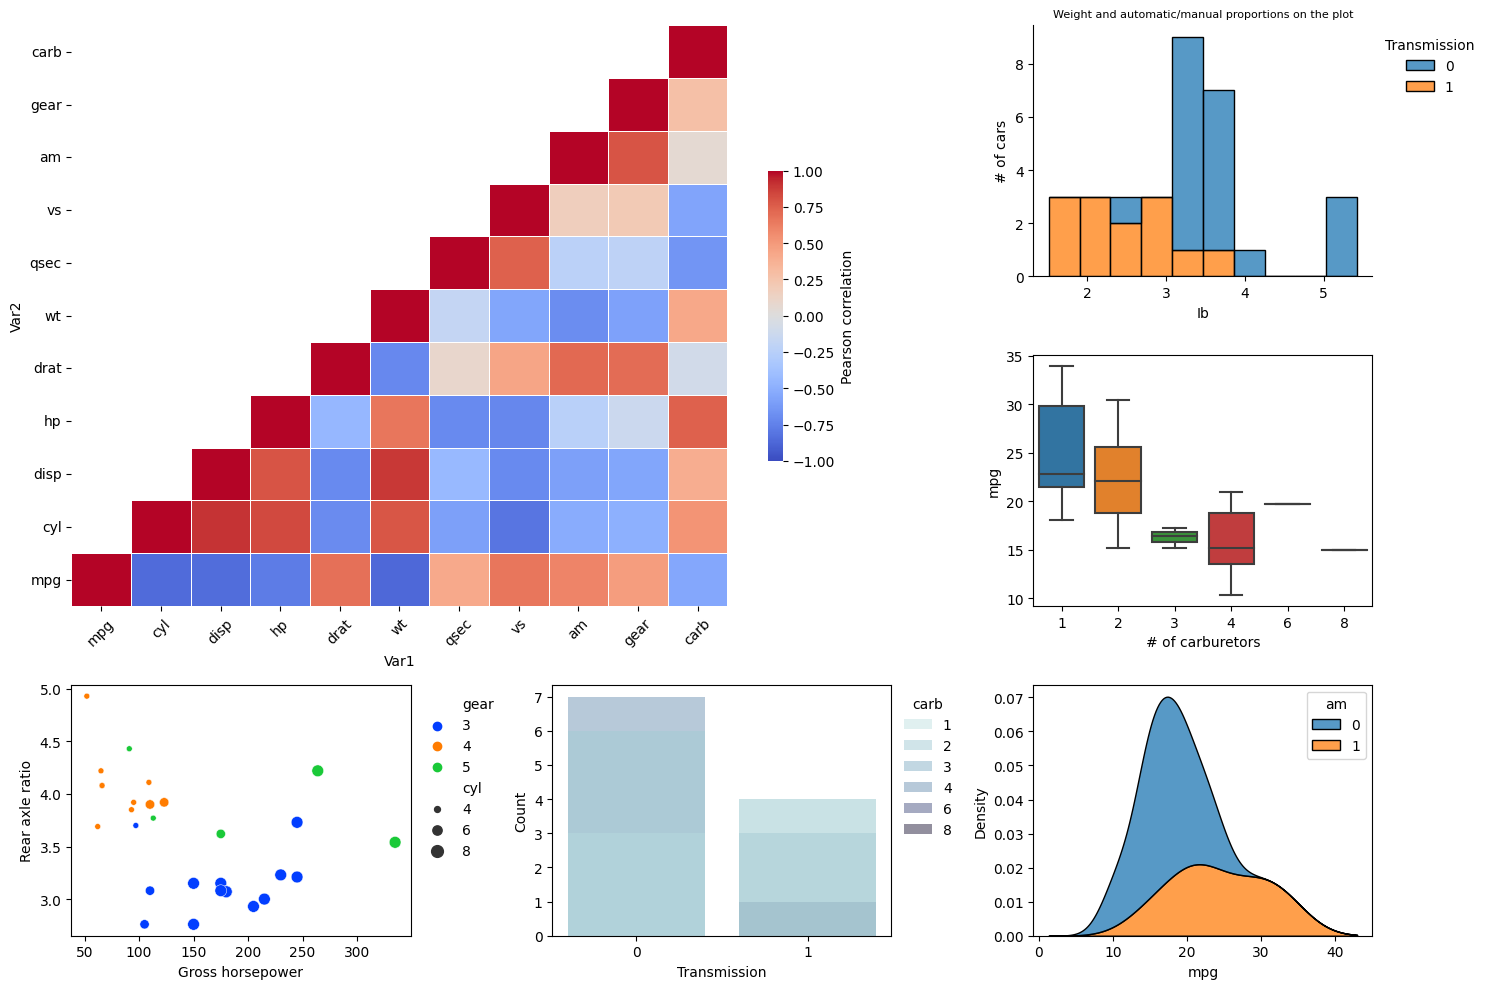

In [34]:
# Calculate mask for correlation heatmap
mask = np.tril(df.corr(numeric_only=True), k=-1)


# Plot correlation heatmap
sns.heatmap(df.corr(numeric_only=True)[::-1], mask=mask[::-1], ax=ax1, cmap="coolwarm",
            linewidth=.5, center=0, cbar_kws={'shrink': 0.5}, vmax=1, vmin=-1)
cbar = ax1.collections[0].colorbar
cbar.set_label("Pearson correlation", rotation=90)
ax1.set_xlabel('Var1')
ax1.set_ylabel('Var2')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# Plot histogram with stacked bars
sns.histplot(data=df, x='wt', ax=ax3, hue='am', multiple='stack', bins=10)
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1), frameon=False, title='Transmission')
ax3.set_title('Weight and automatic/manual proportions on the plot', size=8)
ax3.set_xlabel('Ib')
ax3.set_ylabel('# of cars')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_xticks([2, 3, 4, 5])

# Boxplot
sns.boxplot(data=df, x="carb", y='mpg', ax=ax6)
ax6.set_xlabel('# of carburetors')
ax6.set_ylabel('mpg')

sns.scatterplot(data=df, x='hp', y='drat', hue='gear', size='cyl', ax=ax7, palette="bright")
ax7.set_xlabel('Gross horsepower')
ax7.set_ylabel('Rear axle ratio')
sns.move_legend(ax7, "upper left", bbox_to_anchor=(1, 1), frameon=False)

sns.histplot(data=df, x='am', ax=ax8, hue='carb', palette="ch:start=.2,rot=-.3",
             edgecolor=None, discrete=True, shrink=0.8)
sns.move_legend(ax8, "upper left", bbox_to_anchor=(1, 1), frameon=False)
ax8.set_xlabel('Transmission')
ax8.set_xticks([0, 1])

sns.kdeplot(data=df, x='mpg', hue='am', multiple='stack', ax=ax9)

fig.tight_layout()

fig
#plt.show()